# Reading image files

In [25]:
import yaml
import glob
import os
import pathlib

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from PIL import Image

# Configuration Yaml

In [70]:
#read yaml file
with open('C:/Users/chahinez/Documents/hands-on-2021/notebooks/train_model.yaml') as file:
    yaml_data= yaml.safe_load(file)
print(yaml_data)

{'data1': 'C:/Users/chahinez/Documents/hands-on-2021/GTSRB/GTSRB/Final_Training/Images/*/*.csv', 'model_path': 'C:/Users/chahinez/Documents/hands-on-2021/models/traffic_signs', 'test_size': 0.2, 'random_state': 42, 'batch_size': 32, 'epochs': 15, 'N': 1000, 'optimizer': 'adam', 'activation': 'relu', 'activation_L': 'softmax', 'Dropout_rate1': 0.25, 'Dropout_rate2': 0.25, 'Dropout_rate3': 0.5, 'metrics': 'accuracy', 'loss': 'categorical_crossentropy'}


In [71]:
# Function to load yaml configuration file
def load_config(parameters):
    with open(os.path.join('C:/Users/chahinez/Documents/hands-on-2021/notebooks/train_model.yaml', parameters)) as file:
        config = yaml.safe_load(file)

    return config

In [72]:
config = load_config('C:/Users/chahinez/Documents/hands-on-2021/notebooks/train_model.yaml')

# Exctract images

In [29]:

cd

C:\Users\chahinez


In [30]:
### Training 1 fois suffit

In [5]:
pwd()

'C:\\Users\\chahinez\\Documents\\hands-on-2021\\notebooks'

In [68]:
! curl –O https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip >  Documents/hands-on-2021/GTSRB/GTSRB_Final_Training_Images.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) Could not resolve host: –O
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  1  263M    1 3712k    0     0  3098k      0  0:01:27  0:00:01  0:01:26 3098k
  3  263M    3 8304k    0     0  3777k      0  0:01:11  0:00:02  0:01:09 3779k
  4  263M    4 12.5M    0     0  4017k      0  0:01:07  0:00:03  0:01:04 4018k
  6  263M    6

In [69]:
import zipfile
with zipfile.ZipFile("Documents/hands-on-2021/GTSRB/GTSRB_Final_Training_Images.zip","r") as zip_ref:
    zip_ref.extractall("Documents/hands-on-2021/GTSRB")

In [70]:
### Test final image

In [70]:
! curl –O https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip>  Documents/hands-on-2021/GTSRB/GTSRB_Final_Test_Images.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) Could not resolve host: –O
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  4 84.8M    4 3616k    0     0  2892k      0  0:00:30  0:00:01  0:00:29 2895k
  8 84.8M    8 7664k    0     0  3406k      0  0:00:25  0:00:02  0:00:23 3406k
 13 84.8M   13 11.3M    0     0  3536k      0  0:00:24  0:00:03  0:00:21 3536k
 17 84.8M   17

In [71]:
import zipfile
with zipfile.ZipFile("Documents/hands-on-2021/GTSRB/GTSRB_Final_Test_Images.zip","r") as zip_ref1:
    zip_ref1.extractall("Documents/hands-on-2021/GTSRB")

In [72]:
### Test # 1 fois surffit 

In [73]:
! curl –O https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip >  Documents/hands-on-2021/GTSRB/GTSRB_Final_Test_GT.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) Could not resolve host: –O
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 99620  100 99620    0     0   278k      0 --:--:-- --:--:-- --:--:--  278k


In [74]:
import zipfile
with zipfile.ZipFile("Documents/hands-on-2021/GTSRB/GTSRB_Final_Test_GT.zip","r") as zip_ref2:
    zip_ref2.extractall("Documents/hands-on-2021/GTSRB")

### OUVERTURE CHEMIN ET IMAGE

In [31]:
TRAINING_CSV_PATH = config['data1']


IMAGE_WIDTH = 30
IMAGE_HEIGHT = IMAGE_WIDTH

In [32]:
os.path.dirname(TRAINING_CSV_PATH)

'C:/Users/chahinez/Documents/hands-on-2021/GTSRB/GTSRB/Final_Training/Images/*'

In [33]:
def build_images_database(path):
    """Build a pandas DataFrame with all images information.
    
    Parameters
    ----------
    path: path pattern to read csv files containing images information
    
    Returns
    -------
    A pandas DataFrame with one line per image
    """
    df_list = []
    for filename in glob.glob(path):
        df = pd.read_csv(filename, sep=';')
        df['path'] = os.path.dirname(filename) + '/' + df['Filename']
        df_list.append(df)
    
    return pd.concat(df_list, ignore_index=True)


def build_images_list(filename_list, boxes_list=None):
    """Build a list of images as Numpy array
    
    Parameters
    ----------
    filename_list: list of images filenames
    boxes_list: optional list of boxes for clipping within images. Boxes are 4-tuples (x1, y1, x2, y2).
    
    Returns
    -------
    A list of images as Numpy arrays
    
    """
    
    # If no boxes_list is given, generate a fake boxes list with None boxes
    # image.resize will take full size images if argument box == None
    if boxes_list is None:
        boxes_list = [None] * len(filename_list)
        
    assert len(filename_list) == len(boxes_list), "filenames and boxes lists must have the same length"
    
    images_list = []
    for (filename, image_box) in zip(filename_list, boxes_list):
        image = Image.open(filename)
        image = image.resize((IMAGE_WIDTH, IMAGE_HEIGHT), box=image_box) # box argument clips image to (x1, y1, x2, y2)
        image = np.array(image)
        images_list.append(image)
        
    return images_list

def build_classes_array(df, col_name='ClassId'):
    """Build a vector (numpy array) of classes
    
    Parameters
    ----------
    df : pandas Dataframe with column containing classes id
    Returns
    -------
    Numpy array with images classes
    """
    
    return df[col_name].values
    

In [34]:
images_df = build_images_database(TRAINING_CSV_PATH)
images_df.head()

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,path
0,00000_00000.ppm,29,30,5,6,24,25,0,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
1,00000_00001.ppm,30,30,5,5,25,25,0,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
2,00000_00002.ppm,30,30,5,5,25,25,0,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
3,00000_00003.ppm,31,31,5,5,26,26,0,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
4,00000_00004.ppm,30,32,5,6,25,26,0,C:/Users/chahinez/Documents/hands-on-2021/GTSR...


In [35]:
# Reading only 200 images for the moment
images_list = build_images_list(images_df.head(200)['path'].values,
                                images_df.head(200).apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                                          axis=1).values)

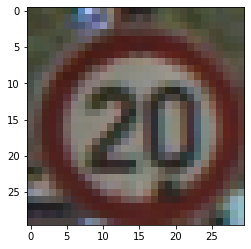

In [36]:
plt.imshow(images_list[190])

In [37]:
build_classes_array(images_df)

array([ 0,  0,  0, ..., 42, 42, 42], dtype=int64)

In [38]:
images_df['ClassId'].value_counts()

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
8     1410
3     1410
11    1320
35    1200
18    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
16     420
34     420
6      420
22     390
36     390
40     360
20     360
21     330
39     300
29     270
24     270
27     240
42     240
32     240
41     240
19     210
37     210
0      210
Name: ClassId, dtype: int64

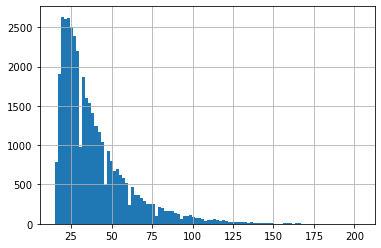

In [39]:
(images_df['Roi.X2'] - images_df['Roi.X1']).hist(bins=100);

In [40]:
(images_df['Roi.Y2'] - images_df['Roi.Y1']).median()

32.0

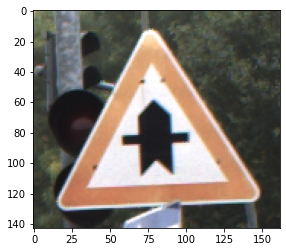

In [41]:
plt.imshow(Image.open(images_df.query('Width == 162')['path'].values[0]))

In [42]:
images_df.head(1)

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,path
0,00000_00000.ppm,29,30,5,6,24,25,0,C:/Users/chahinez/Documents/hands-on-2021/GTSR...


## Training the model

In [43]:
import tensorflow as tf
import keras

In [44]:
from tensorflow import keras

In [45]:
# import cv2
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense , Flatten , Dropout

#### Take a sample to test the code

In [46]:
N = config['N']
N = None # Take all
if N is None:
  images_list = build_images_list(images_df['path'].values,
                                  images_df.apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                                            axis=1).values)
  data = np.array(images_list)
  labels = build_classes_array(images_df)
else:
  images_list = build_images_list(images_df.head(N)['path'].values,
                                  images_df.head(N).apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                                            axis=1).values)
  data = np.array(images_list)
  labels = build_classes_array(images_df)[:N]
print(data.shape, labels.shape)

(1000, 30, 30, 3) (1000,)


In [47]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels,  test_size=config["test_size"],random_state=config["random_state"])

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 30, 30, 3) (200, 30, 30, 3) (800,) (200,)


In [48]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [49]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation=config['activation'], input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation=config['activation']))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate= config['Dropout_rate1']))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation=config['activation']))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation=config['activation']))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=config['Dropout_rate2']))
model.add(Flatten())
model.add(Dense(256, activation=config['activation']))
model.add(Dropout(rate=config['Dropout_rate3']))
model.add(Dense(43, activation=config['activation_L']))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=config['optimizer'], metrics=config['metrics'])

In [50]:
%%time
epochs = 15
history = model.fit(X_train, y_train, batch_size=config["batch_size"], epochs=config["epochs"], validation_data=(X_test, y_test))
#model.save("/my_model.h5")

Epoch 1/15
25/25 [==============================] - 5s 186ms/step - loss: 3.9498 - accuracy: 0.6037 - val_loss: 0.7317 - val_accuracy: 0.8500
Epoch 2/15
25/25 [==============================] - 4s 168ms/step - loss: 0.6503 - accuracy: 0.7700 - val_loss: 0.4538 - val_accuracy: 0.9700
Epoch 3/15
25/25 [==============================] - 4s 172ms/step - loss: 0.3603 - accuracy: 0.8900 - val_loss: 0.2633 - val_accuracy: 1.0000
Epoch 4/15
25/25 [==============================] - 4s 166ms/step - loss: 0.1858 - accuracy: 0.9513 - val_loss: 0.1052 - val_accuracy: 1.0000
Epoch 5/15
25/25 [==============================] - 4s 172ms/step - loss: 0.1052 - accuracy: 0.9787 - val_loss: 0.0973 - val_accuracy: 1.0000oss: 0.1052 - accuracy: 0.97
Epoch 6/15
25/25 [==============================] - 5s 189ms/step - loss: 0.0990 - accuracy: 0.9787 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 7/15
25/25 [==============================] - 4s 167ms/step - loss: 0.0633 - accuracy: 0.9862 - val_loss: 0.0263 -

In [51]:
#import tensorflow as tf
#tf.__version__

## Plot model accuracy & loss

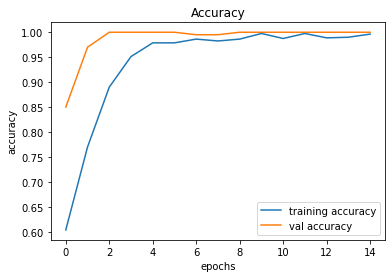

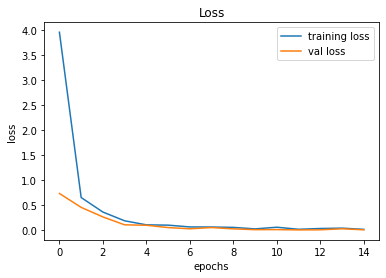

In [52]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


## Save classifier

In [63]:
#model.save("models/traffic_signs_20210319_1144.h5")

def save_classifier(model, basename):
  """ Save to h5 format a TF model with a timestanp

  Parameters
  ----------
  model : trained tf model
  basename : basename including path to use for filename 

  Returns
  -------
  None
  """
  model.save('{}_{}.h5'.format(basename,datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')))
  return

In [64]:
import datetime
#datetime.datetime.now().strftime('%Y-%m-%d_%H:%M:%S')

In [74]:
save_classifier(model,config['model_path'])

## Testing model

In [75]:
def classify_image(path, model,image_box=None):
  """ Classify image by model

  Parameters
  ----------
  path : filepath to image
  model : tf/keras classifier

  Returns
  -------
  class id returned by model classifier
  """
  images_list = []
  image = Image.open(path)
  image = image.resize((IMAGE_WIDTH, IMAGE_HEIGHT), box=image_box) # box argument clips image to (x1, y1, x2, y2)
  image = np.array(image)
  images_list.append(image)

  return model.predict_classes(np.array(images_list))

In [76]:
image_sample = images_df.sample(1)

classify_image(image_sample['path'].values[0],
               model,
               image_sample.apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                  axis=1).values[0]
               )

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1], dtype=int64)

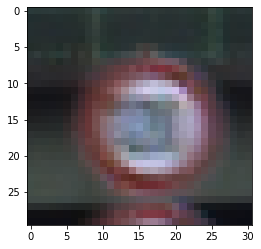

In [77]:
plt.imshow(Image.open(image_sample['path'].values[0]))


## Reloading model

In [78]:
test_model = load_model('C:/Users/chahinez/Documents/hands-on-2021/models/traffic_signs_2021-03-28_17-45-02.h5')

In [79]:
classify_image(image_sample['path'].values[0],
               test_model,
               image_sample.apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                  axis=1).values[0]
               )

array([8], dtype=int64)

## Evaluating performance

#### Load text data

In [80]:
test_images_df = pd.read_csv('C:/Users/chahinez/Documents/hands-on-2021/GTSRB/GT-final_test.csv', sep=';')
test_images_df['path']=test_images_df['Filename'].apply(lambda x:'C:/Users/chahinez/Documents/hands-on-2021/GTSRB/GTSRB/Final_Test/Images/'+x)
test_images_df.head()
#test_images_df.tail() # Voir fin du fichier

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,path
0,00000.ppm,53,54,6,5,48,49,16,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
1,00001.ppm,42,45,5,5,36,40,1,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
2,00002.ppm,48,52,6,6,43,47,38,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
3,00003.ppm,27,29,5,5,22,24,33,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
4,00004.ppm,60,57,5,5,55,52,11,C:/Users/chahinez/Documents/hands-on-2021/GTSR...


In [81]:
# Recharger les images qui permettent d'affichier les formes 
test_list = build_images_list(test_images_df['path'].values,
                                  test_images_df.apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                                            axis=1).values)
test_data = np.array(test_list)
test_labels = build_classes_array(test_images_df)

In [82]:
test_images_df

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,path
0,00000.ppm,53,54,6,5,48,49,16,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
1,00001.ppm,42,45,5,5,36,40,1,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
2,00002.ppm,48,52,6,6,43,47,38,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
3,00003.ppm,27,29,5,5,22,24,33,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
4,00004.ppm,60,57,5,5,55,52,11,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
...,...,...,...,...,...,...,...,...,...
12625,12625.ppm,42,41,5,6,37,36,12,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
12626,12626.ppm,50,51,6,5,45,46,33,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
12627,12627.ppm,29,29,6,6,24,24,6,C:/Users/chahinez/Documents/hands-on-2021/GTSR...
12628,12628.ppm,48,49,5,6,43,44,7,C:/Users/chahinez/Documents/hands-on-2021/GTSR...


In [83]:
print(test_data.shape, test_labels.shape)

(12630, 30, 30, 3) (12630,)


In [84]:
%%time
results = test_model.predict_classes(test_data)# Passapage predict classe , premier 16 , 1 38

Wall time: 13.6 s


In [85]:
test_labels[:3] # On vérifie il s'est pas trompé

array([16,  1, 38], dtype=int64)

In [86]:
(test_labels == results).sum()/ test_labels.shape[0]

0.9615993665874901

### Compare actual to predicted (class-level)

In [87]:
accuracy_df = pd.DataFrame()
accuracy_df['actual'] = test_labels
accuracy_df['predicted'] = results

In [88]:
accuracy_df.head()

,actual,predicted
0,16,16
1,1,1
2,38,38
3,33,33
4,11,11


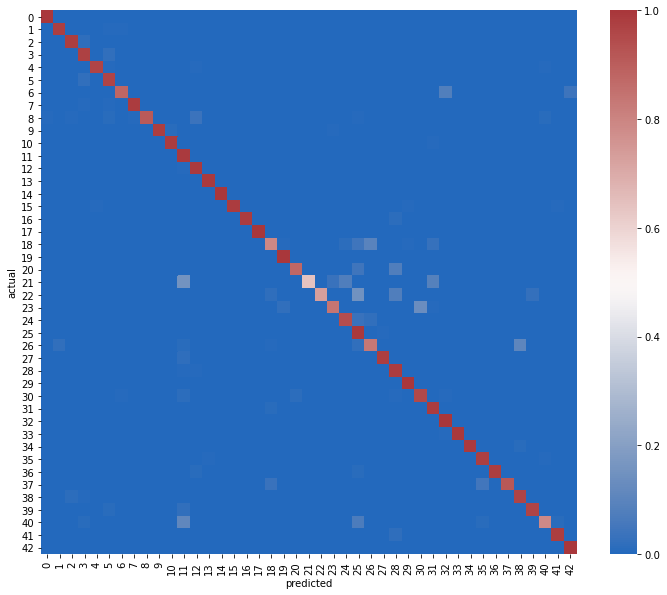

In [89]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pd.crosstab(accuracy_df['actual'], accuracy_df['predicted'], normalize='index'),
            cmap='vlag',
            ax=ax);
# on croise les classes actuelles(0 à 42)avec classes predicted,  plus c'est clair plus ca correspond
# On veut la plus belle diagonale possible
# Version graphique d'une table de confusion
#Ici valeur absolu alors que on veut poucentage

In [30]:
# pd.crosstab(accuracy_df['actual'], accuracy_df['predicted'])
#pd.crosstab(accuracy_df['predicted'], accuracy_df['actual'], normalize = 'index')

### Predict probabilities and plot

In [90]:
class_names = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)',
               'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
               'Speed limit (120km/h)','No passing','No passing veh over 3.5 tons','Right-of-way at intersection',
               'Priority road','Yield','Stop','No vehicles',
               'Veh > 3.5 tons prohibited','No entry','General caution','Dangerous curve left',
               'Dangerous curve right','Double curve','Bumpy road','Slippery road',
               'Road narrows on the right','Road work','Traffic signals','Pedestrians',
               'Children crossing','Bicycles crossing','Beware of ice/snow','Wild animals crossing',
               'End speed + passing limits','Turn right ahead','Turn left ahead','Ahead only',
               'Go straight or right','Go straight or left','Keep right','Keep left',
               'Roundabout mandatory', 'End of no passing', 'End no passing veh > 3.5 tons']

In [91]:
# New classifier for classes probability

In [93]:
def classify_image(path, model,image_box=None):
  """ Classify image by model

  Parameters
  ----------
  path : filepath to image
  model : tf/keras classifier

  Returns
  -------
  class id returned by model classifier
  """
  images_list = []
  image = Image.open(path)
  image = image.resize((IMAGE_WIDTH, IMAGE_HEIGHT), box=image_box) # box argument clips image to (x1, y1, x2, y2)
  image = np.array(image)
  images_list.append(image)

  return model.predict(np.array(images_list))

In [94]:
test_image_sample = test_images_df.sample(1)

#classify_image(test_image_sample['path'].values[0],
               #test_model,
               #test_image_sample.apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                  #axis=1).values[0]
               #)

In [95]:
def plot_image( path, model,test_labels):
  predictions1= classify_image(test_image_sample['path'].values[0],
               model,
               test_image_sample.apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                  axis=1).values[0]
               )
  true_label = test_labels[test_image_sample.index.values][0] #, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(Image.open(test_image_sample['path'].values[0]), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions1)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  print("La veritable classe du panneau est : "+ class_names[true_label] + " qui correspond à la classe {}. ".format(true_label))
  print("Avec une confiance de {} %, ".format(100*np.max(predictions1)))
  print("le modèle estime que le panneau informe que : "+ class_names[predicted_label] + ". Ce panneau appartient à la classe {} . ".format(np.argmax(predictions1)))



def plot_value_array(path, model,test_labels):
  predictions1= classify_image(test_image_sample['path'].values[0],
               model,
               test_image_sample.apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                  axis=1).values[0]
               )
  predictions1= predictions1.flatten()
  true_label = test_labels[test_image_sample.index.values][0] 

  #figure(figsize=(20, 6), dpi=80)
  plt.grid(False)
  plt.xticks(range(43))
  plt.yticks([])
  thisplot = plt.bar(range(43), predictions1, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions1)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

La veritable classe du panneau est : General caution qui correspond à la classe 18. 
Avec une confiance de 85.80834865570068 %, 
le modèle estime que le panneau informe que : General caution. Ce panneau appartient à la classe 18 . 


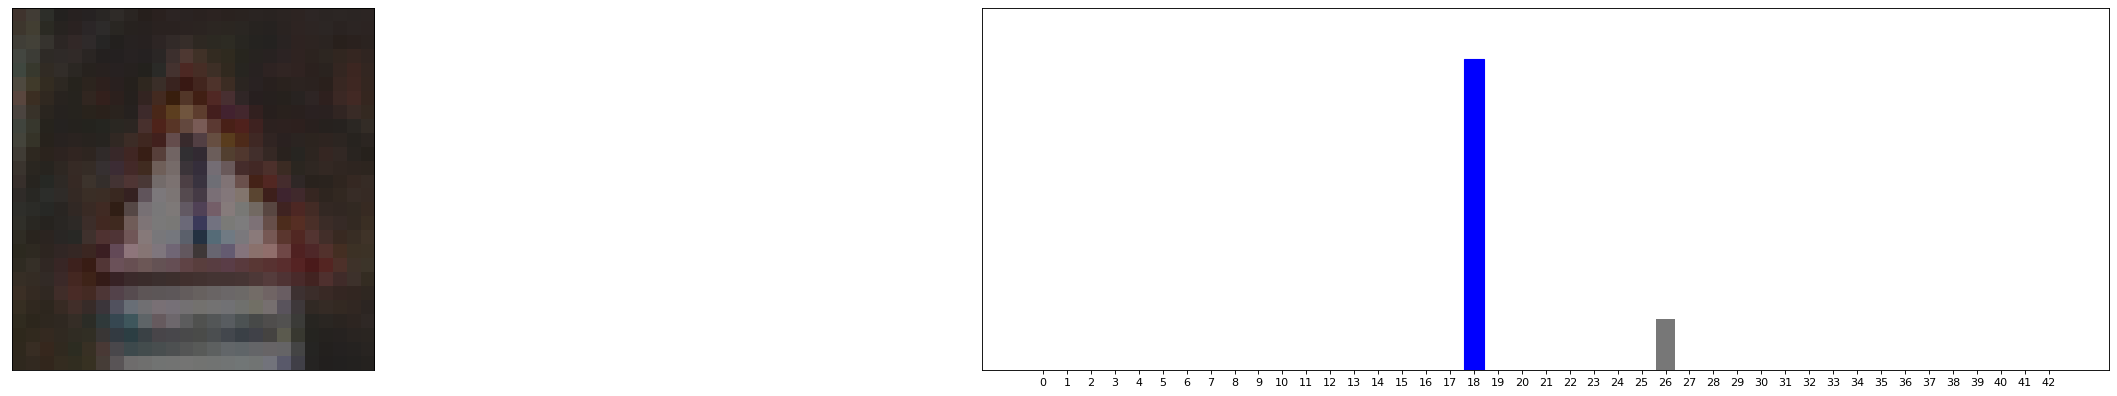

In [96]:
figure(figsize=(40, 6), dpi=80)
plt.subplot(1,2,1)
plot_image(test_image_sample['path'].values[0],test_model, test_labels)
plt.subplot(1,2,2)
plot_value_array(test_image_sample['path'].values[0],test_model, test_labels)
plt.show()


###  Constrution dataframe de confiance

In [97]:

#marchheeeee = test_images_df.loc[[1]]

In [ ]:
loooop = []
for i, row in test_images_df.iterrows():
    loooop.append(classify_image(test_images_df.loc[[i]]['path'].values[0],
                                  test_model,
                                  test_images_df.loc[[i]].apply(lambda r: (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']),
                                                                axis=1).values[0]
                                 )
                  )
        


In [48]:
arr = np.array(loooop)

In [49]:
arr

array([[[7.05507560e-29, 4.67384228e-21, 4.70601777e-25, ...,
         1.10052584e-28, 9.02950874e-20, 5.93463905e-25]],

       [[0.00000000e+00, 1.00000000e+00, 4.05090903e-37, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 3.31123441e-26, 3.01594235e-30, ...,
         1.33670540e-28, 1.48945008e-30, 8.62907559e-35]],

       ...,

       [[4.83037525e-07, 7.58203352e-03, 1.48533261e-04, ...,
         7.41628980e-07, 4.73588618e-04, 4.07788262e-04]],

       [[4.37395363e-15, 1.14471055e-08, 3.84300369e-10, ...,
         8.76283313e-09, 3.75707075e-16, 1.10169174e-11]],

       [[5.80249321e-11, 8.06240124e-08, 1.00678676e-07, ...,
         1.35827714e-08, 8.56522579e-12, 5.08721865e-09]]], dtype=float32)

In [50]:
arrf= arr.flatten()
arrf

array([7.0550756e-29, 4.6738423e-21, 4.7060178e-25, ..., 1.3582771e-08,
       8.5652258e-12, 5.0872186e-09], dtype=float32)

In [51]:
cdf= pd.DataFrame(arrf) 
cdf

,0
0,7.055076e-29
1,4.673842e-21
2,4.706018e-25
3,1.188867e-22
4,1.677405e-26
...,...
543085,1.502223e-08
543086,3.484087e-10
543087,1.358277e-08
543088,8.565226e-12


In [52]:
countt = pd.DataFrame(12630*list(range(0,43)))
countt

,0
0,0
1,1
2,2
3,3
4,4
...,...
543085,38
543086,39
543087,40
543088,41


In [53]:
jcd= pd.DataFrame(np.repeat(list(range(0,12630)),43))   

In [54]:
jcd

,0
0,0
1,0
2,0
3,0
4,0
...,...
543085,12629
543086,12629
543087,12629
543088,12629


In [55]:
maybe= pd.merge(cdf, countt, left_index=True, right_index=True)

In [56]:
maybe= pd.merge(maybe, jcd, left_index=True, right_index=True)

In [57]:
maybe

,0_x,0_y,0
0,7.055076e-29,0,0
1,4.673842e-21,1,0
2,4.706018e-25,2,0
3,1.188867e-22,3,0
4,1.677405e-26,4,0
...,...,...,...
543085,1.502223e-08,38,12629
543086,3.484087e-10,39,12629
543087,1.358277e-08,40,12629
543088,8.565226e-12,41,12629


In [58]:
maybe.rename(columns={'0_x':'confiance','0_y':'classe',0:'nbimage'}, inplace=True)

In [59]:
maybe

,confiance,classe,nbimage
0,7.055076e-29,0,0
1,4.673842e-21,1,0
2,4.706018e-25,2,0
3,1.188867e-22,3,0
4,1.677405e-26,4,0
...,...,...,...
543085,1.502223e-08,38,12629
543086,3.484087e-10,39,12629
543087,1.358277e-08,40,12629
543088,8.565226e-12,41,12629


In [62]:
maybe.to_csv(r'C:/Users/chahinez/Documents/hands-on-2021/app/Imagedata.csv')

In [63]:
dfg = pd.read_csv('C:/Users/chahinez/Documents/hands-on-2021/app/Imagedata.csv')

In [64]:
dfg

,Unnamed: 0,confiance,classe,nbimage
0,0,7.055076e-29,0,0
1,1,4.673842e-21,1,0
2,2,4.706018e-25,2,0
3,3,1.188867e-22,3,0
4,4,1.677406e-26,4,0
...,...,...,...,...
543085,543085,1.502223e-08,38,12629
543086,543086,3.484087e-10,39,12629
543087,543087,1.358277e-08,40,12629
543088,543088,8.565226e-12,41,12629


In [101]:
test_model = tf.keras.models.load_model('C:/Users/chahinez/Documents/hands-on-2021/models/traffic_signs_2021-03-28_17-45-02.h5')

In [102]:
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)         